# Visualizations for TDA
This is the code that visualizes the different charts and diagrams used in TDA project Quantifying Congestions in Nairobi

1. Scatter Plot With Histogram
2. Creation of Signatures
3. Map + Barcode Generation
4. p-value Matrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

#plt.style.available
plt.style.use('seaborn-colorblind') # Can be changed to whatever
# Others are 'bmh', 'seaborn'
plt.grid(True)
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['t']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

plt.style.use('dark_background')

# PCA Scatter Plot with Histograms
The following code will Reproduce a scatter plot from the PCA.

## slightly smaller text

In [2]:
def scatter_hist(df, ax, ax_histx, ax_histy, hours):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    
    for hour in hours:
        x = df.loc[df['hour']==hour, ['principal component 1']].values
        y = df.loc[df['hour']==hour, ['principal component 2']].values
        # the scatter plot:
        ax.scatter(x, y)
        ax.set_xlim([-15, 25])
        ax.set_ylim([-2.5, 3])

        # now determine nice limits by hand:
        binwidthX = 0.25
        binwidthY = 1
        xmax = np.max(np.abs(x))
        ymax = np.max(np.abs(y))
        limx = (int(xmax/binwidthX) + 1) * binwidthX
        limy = (int(ymax/binwidthY) + 1) * binwidthY
        
        binx = np.arange(-limx, limx + binwidthX, binwidthX)
        biny = np.arange(-limy, limy + binwidthY, binwidthY)
        ax_histx.hist(x, alpha =0.5)
        ax_histy.hist(y, orientation='horizontal',alpha =0.5)
    
    ax_histx.legend([r"\textrm{"+str(hour)+r":00}" for hour in hours], bbox_to_anchor=(1.3,1)
                    , title = r"\textrm{Hours:}",title_fontsize=14,handlelength =2,edgecolor='black',prop={'size': 12})
    ax.set_xlabel(r"\textrm{Principal Component 1}",**{'size'   : 14})
    ax.set_ylabel(r"\textrm{Principal Component 2}",**{'size'   : 14})
    ax.grid(True)
    ax_histx.grid(True)
    ax_histy.grid(True)

C:\Users\ericb\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


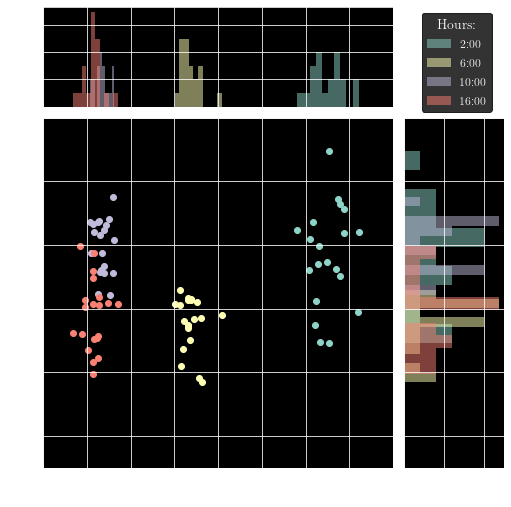

In [3]:
df = pd.read_csv("Csv Files\\PCA_DowntownNairobi.csv")
df.set_index(df.columns[0])

hours = [2,6,10,16]

# some random data
x = df['principal component 1']
y = df['principal component 2']
# start with a square Figure

fig = plt.figure(figsize=(8, 8)) # Change if not want square


# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(df, ax, ax_histx, ax_histy, hours)

#ax_histx.set_title(r"\textrm{PCA of Signatures, March 2019}",fontsize=16)
plt.tight_layout()
plt.savefig("Plots\\PCA.png")
plt.show()

# Creation of Signatures
The following code will reproduce the signatures diagrams

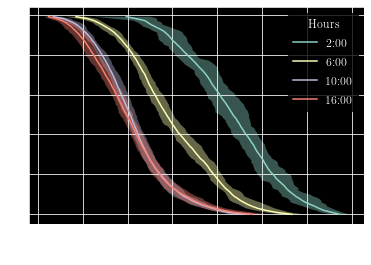

In [4]:
df = pd.read_csv('Csv Files\\signatures_DowntownNairobi.csv')
df.set_index(df.columns[0])
hours = [2,6,10,16] #{2, 8, 12, 14, 19, 22}

rc('font',**{'size'   : 12})
x = [float(x) for x in df.columns[1:101]] # Set x-axis
from statistics import mean
for hour in hours: #(df.hour)
    Y = df[df['hour']==hour]
    y =  [list(Y[col])for col in Y]
    
    y_max = [np.percentile(y,95) for y in y[1:101]]
    y_min = [np.percentile(y,5) for y in y[1:101]]

    y_mean =  [list(Y[col]) for col in Y]
    y_mean = [mean(y) for y in y[1:101]]
    
    plt.plot(y_mean[::-1], x)
    plt.fill_betweenx(x,y_min[::-1],y_max[::-1], alpha=0.4)

plt.legend([r"\textrm{"+str(str(x)+":00}") for x in hours],title=r"\textrm{Hours}",loc='upper right'
           , borderpad =None,edgecolor='black')
plt.grid(True)
plt.xlabel(r"\textrm{Speed [km/h]}")
#plt.title(r"\textrm{Signatures of March 2019}")
plt.savefig('Plots\\signatures.png')

# Map + Barcode Generation

In [5]:
df_barcode = pd.read_csv('Csv Files\\Birth_death_2019_Q1_12.csv',sep=';')
df_map = pd.read_csv('Csv Files\\road_persistence_2019_Q1_12.csv',sep=';')

(-2.4399999999999995, 53.43999999999999) (4.27765, 13.41535)


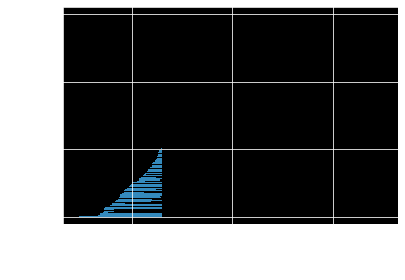

(-5.089999999999999, 109.08999999999996) (3.9276500000000008, 20.76535)


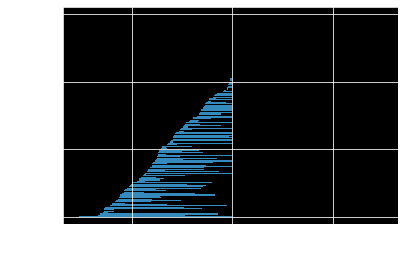

(-6.9399999999999995, 147.93999999999997) (3.1776500000000008, 36.51535)


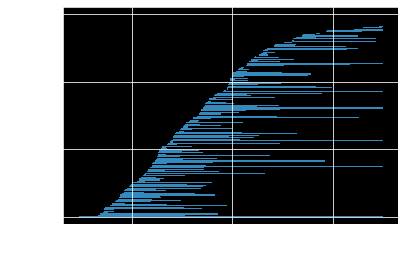

In [6]:
# Set twice as large font size 

        
rc('font',**{'size'   : 20})

# Skapa barcode [0, x]. Håll bestämd x-axel.
speeds = [13, 20,35]
for i,max_speed in enumerate(speeds):
    bars = []
    df = df_barcode[df_barcode['birth']<=max_speed]
    fig, ax = plt.subplots()

    for index, row in df.iterrows():
        birth = float(row['birth'])
        death = float(row['death'])
        if death >= max_speed or death == 0:
            death=max_speed

        length = death-birth
        bars.append((birth,length))

    for i2, bar in enumerate(bars):
        #print(i,bar)
        ax.broken_barh([bar], (i2+0.1, 0.8), facecolors='#348ABD')

    ax.set_xlabel(r"\textrm{Speed [km/h]}")
    ax.set_ylabel(r"\textrm{Bar ID}")
    
    print(plt.ylim(), plt.xlim())
    
    # Set after seeing what they were on the last one.
    plt.ylim((-5, 155))
    plt.xlim((3.1776500000000008, 36.51535))
    plt.grid(True)
    #plt.title(r"\textrm{Barcode of Downtown Nairobi Q1 2019}")
    plt.savefig(str("Plots\\BarCode_"+str(i+1)+".png"),bbox_inches='tight', pad_inches=0.15)
    plt.show()

(-1.29023422, -1.27798638) (36.809138555, 36.833878545000005)


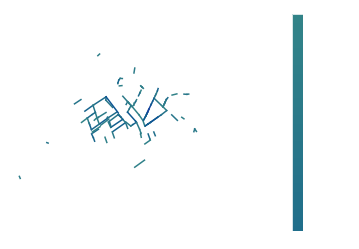

(-1.29356468, -1.2771223200000001) (36.808882940000004, 36.83924645999999)


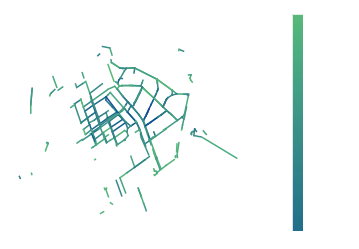

(-1.29438652, -1.27492048) (36.808716755, 36.842736345000006)


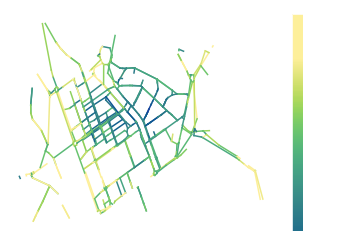

In [7]:
import cmocean # color scheme

min_color = 5
max_color = 35
speeds = [13, 20,35]
sm = plt.cm.ScalarMappable(cmap=cmocean.cm.haline, norm=plt.Normalize(vmin=min_color, vmax=max_color))

tick_int = [1,2,5]
for i,max_speed in enumerate(speeds):
    df = df_map[df_map['speed']<=max_speed]
    for index, row in df.iterrows():
        clr = sm.get_cmap()(row['speed']/(max_color-min_color))
        plt.plot([row['lon_1'],row['lon_2']], [row['lat_1'],row['lat_2']],color=clr)
    plt.axis('off')

    lower = 10/(max_color-min_color)
    upper = max_speed/(max_color-min_color)
    newcmp = matplotlib.colors.ListedColormap(cmocean.cm.haline(np.linspace(lower, upper, 256)))
    temp_sm = plt.cm.ScalarMappable(cmap=newcmp, norm=plt.Normalize(vmin=10, vmax=max_speed))

    plt.colorbar(temp_sm,label=r'\textrm{Speed [km/h]}',ticks=range(10,max_speed+1,tick_int[i]))
    # Set x-y lim
    print(plt.ylim(), plt.xlim())
    
    # Set after seeing what they were on the last one.
    plt.ylim((-1.29438652, -1.27492048))
    plt.xlim((36.808716755, 36.842736345000006))
    #plt.title(r"\textrm{Map of Downtown Nairobi Q1 2019}")
    plt.savefig(str("Plots\\map_"+str(i+1)+".png"))
    plt.show()

# PC P-value Matrix
Code for visualizing the p-value matrix used

In [8]:
df = pd.read_csv('Csv Files\\Downtown_allhours_pvalues_shapiro.csv', index_col=0)


In [9]:
hours = df.columns[:24]
data = df[hours].values


# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
#gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
#                      left=0.1, right=0.9, bottom=0.1, top=0.9,
#                      wspace=0.05, hspace=0.05)
fig = plt.figure(figsize=(8, 8)) # Change if not want square


# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(20, 1), height_ratios=(20, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.2, hspace=0.2)

ax_scatter = fig.add_subplot(gs[0, 0])
ax_clrbar_h = fig.add_subplot(gs[1, 0])
ax_clrbar_v = fig.add_subplot(gs[0, 1])

#ax_scatter.yaxis.set_label_position('right')
ax_scatter.xaxis.set_label_position('top')
ax_scatter.set_xlabel('Hours\n')
ax_scatter.set_ylabel('Hours\n')
ax_scatter.xaxis.tick_top()
ax_scatter.set_xlim(-0.5,23.5)
ax_scatter.set_ylim(-0.5,23.5)
ax_scatter.xaxis.set_ticks(range(24))
ax_scatter.yaxis.set_ticks(range(24))
#ax_scatter.set_xticklabels([str(str(x)+":00") for x in range(24)])
ax_scatter.set_yticklabels([str(str(x)+":00") for x in range(24)])

ax_scatter.grid(True)
# Draw white lines here for grid.


### Color bars
#sm_h = plt.cm.ScalarMappable(cmap=cmocean.cm.haline_r, norm=plt.Normalize(vmin=0, vmax=.1))
#sm_v = plt.cm.ScalarMappable(cmap=cmocean.cm.solar_r, norm=plt.Normalize(vmin=0, vmax=.1))

sm_h = plt.cm.ScalarMappable(cmap=plt.get_cmap("RdYlGn_r"), norm=plt.Normalize(vmin=0, vmax=.1))
sm_v = plt.cm.ScalarMappable(cmap=plt.get_cmap("RdYlGn_r"), norm=plt.Normalize(vmin=0, vmax=.1))

fig.colorbar(sm_h,cax=ax_clrbar_h,orientation='horizontal')
fig.colorbar(sm_v,cax=ax_clrbar_v,orientation='vertical')


## Draw circels using scatter on ax_scatter

for i,row in enumerate(data):
    for j, point in enumerate(row):
        scale=200
        if j>i:
            ax_scatter.scatter([i],[j],s=scale,c=[sm_v.get_cmap()(point)])
            ax_scatter.scatter([i],[j],s=scale,c=[sm_v.get_cmap()(point)])
        elif j<i:
            pass
            #ax_scatter.scatter([i],[j],s=scale,c=[sm_h.get_cmap()(point)])
            #ax_scatter.scatter([i],[j],s=scale,c=[sm_h.get_cmap()(point)])
        else:
            clr = 0
plt.savefig(str("Plots\\value_matrix.pdf"))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ericb\\.matplotlib\\tex.cache\\c2ce166f23afd342a450941f9d8a1581.dvi'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000025282E488B8> (for post_execute):


RuntimeError: dvipng was not able to process the following string:
b''

Here is the full report generated by dvipng:
C:\Users\ericb\.matplotlib\tex.cache\c2ce166f23afd342a450941f9d8a1581.dvi: No such file or directory
This is dvipng 1.16 Copyright 2002-2015, 2019 Jan-Ake Larsson




RuntimeError: dvipng was not able to process the following string:
b''

Here is the full report generated by dvipng:
C:\Users\ericb\.matplotlib\tex.cache\c2ce166f23afd342a450941f9d8a1581.dvi: No such file or directory
This is dvipng 1.16 Copyright 2002-2015, 2019 Jan-Ake Larsson




<Figure size 576x576 with 3 Axes>

In [ ]:
X = []
for x in range(24):
    X.append(str(str(x)+":00"))
X

In [ ]:
plt.cm.ScalarMappable(cmap=plt.get_cmap("coolwarm"), norm=plt.Normalize(vmin=0, vmax=1)).get_cmap()(100)

In [ ]:
plt.cm.ScalarMappable(cmap=plt.get_cmap("coolwarm"), norm=plt.Normalize(vmin=0, vmax=1)).get_cmap()(0)